# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Оглавление:**
1. [Изучение данных](#1)
2. [Предобработка данных](#2)
3. [Добавление в таблицу новых столбцов](#3)
4. [Исследовательский анализ данных](#4)
5. [Общий вывод](#5)

<a id="1"></a>
##  Изучение данных

**1.1** Импортируем необходимые для дальнейшей работы библиотеки.

Сохраняем исследуемый датафрейм в переменную `data`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('datasets/real_estate_data.csv', sep='\t')

**1.2** Выводим на экран первые 15 строк датафрейма для ознакомления. 

In [3]:
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**1.3** Выводим общую информацию о таблице.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**1.4** Что мы имеем.

Таблица содержит `23699 строк` и `22 столбца`:

`total_images` — число фотографий квартиры в объявлении.

`last_price` — цена квартиры на момент снятия с публикации.

`total_area` — общая площадь квартиры в квадратных метрах (м²).

`first_day_exposition` — дата публикации.

`rooms` — число комнат.

`ceiling_height` — высота потолков (м).

`floors_total` — всего этажей в доме.

`living_area` — жилая площадь в квадратных метрах (м²).

`floor` — этаж.

`is_apartment` — апартаменты (булев тип).

`studio` — квартира-студия (булев тип).

`open_plan` — свободная планировка (булев тип).

`kitchen_area` — площадь кухни в квадратных метрах (м²).

`balcony` — число балконов.

`locality_name` — название населённого пункта.

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м).

`cityCenters_nearest` — расстояние до центра города (м).

`parks_around3000` — число парков в радиусе 3 км.

`parks_nearest` — расстояние до ближайшего парка (м).

`ponds_around3000` — число водоёмов в радиусе 3 км.

`ponds_nearest` — расстояние до ближайшего водоёма (м).

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия).

По общей информации видно, что в таблице присутствует много пропусков. 

Также некоторые типы данных не соответствуют содержанию столбцов. Например, в `first_day_exposition` должен быть формат `datetime`, однако там содержатся данные типа `object`. 

С этим мы разберёмся в пункте "Предобработка данных". 

**1.5** Выведем гистограммы для всех числовых столбов, чтобы понимать разброс данных. 

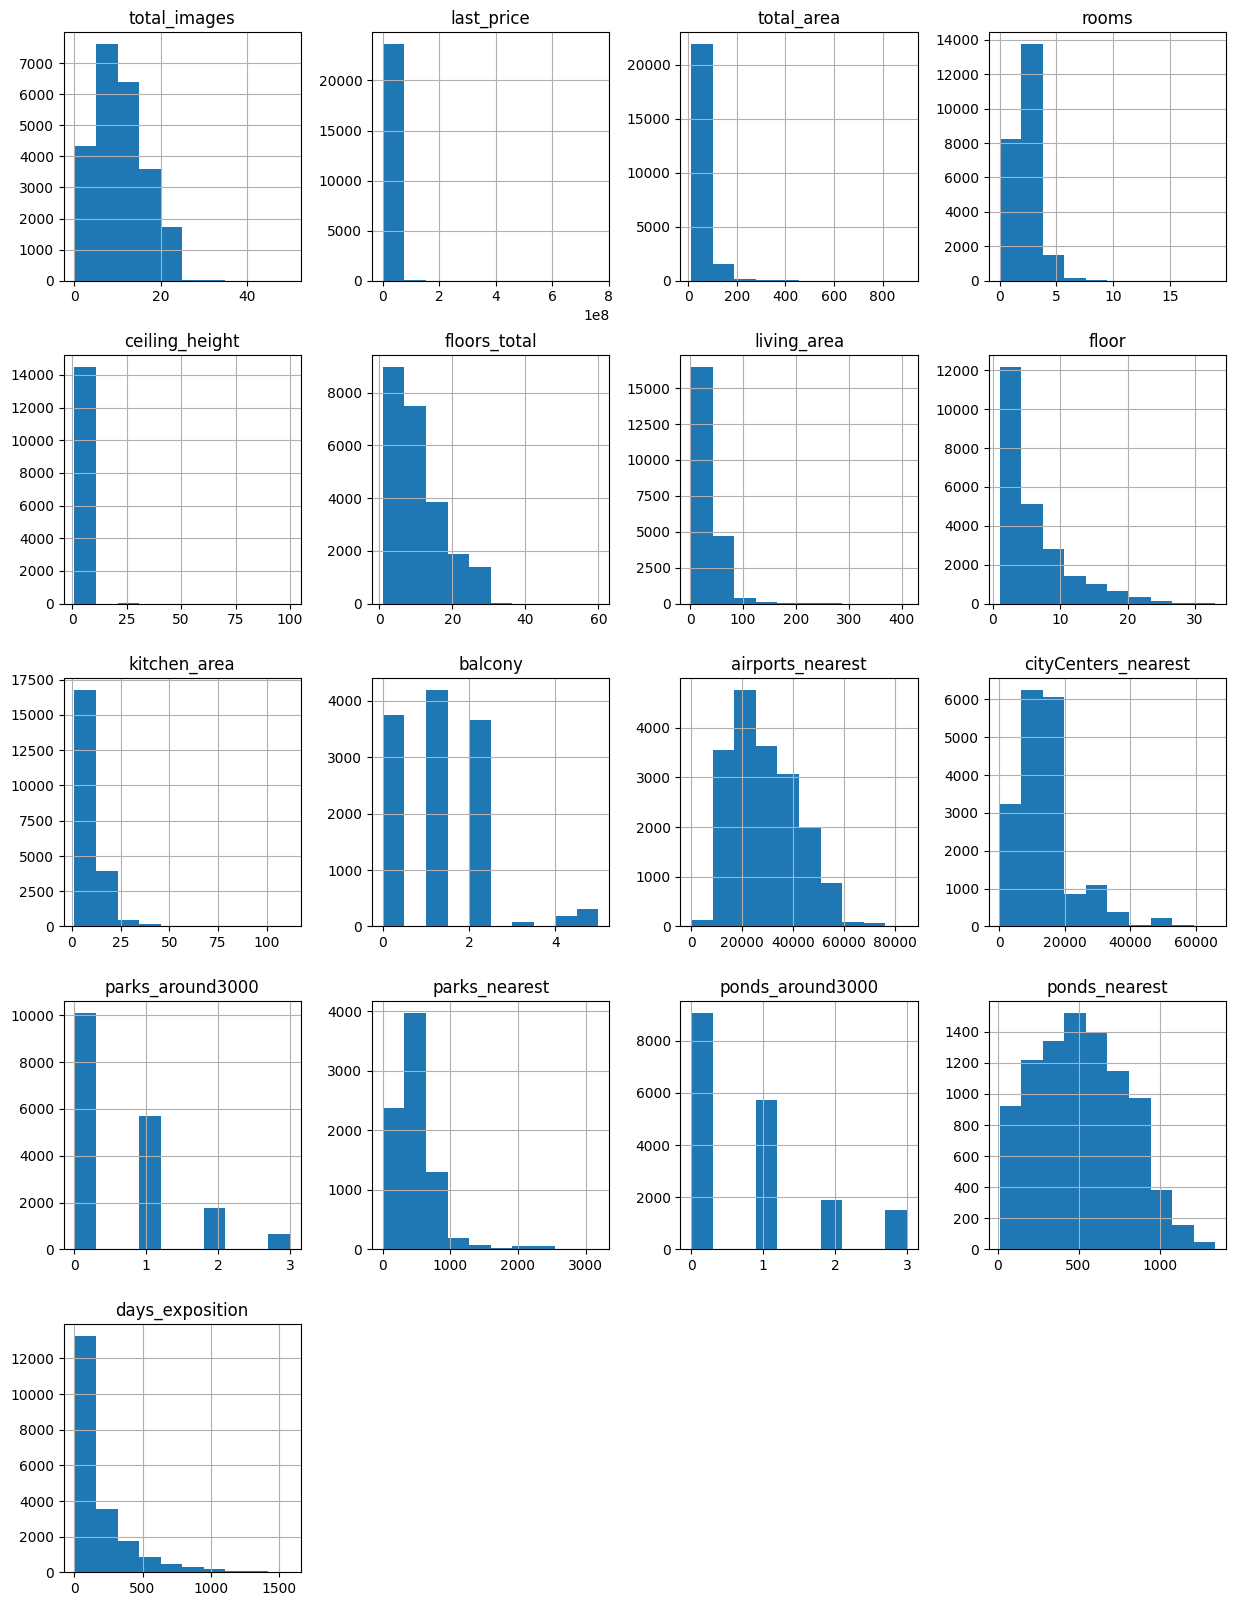

In [6]:
data.hist(figsize=(15, 20))
plt.show()

**1.6** По гистограммам видно приблизительное распределение значений по каждому из столбцу, имеющему числовые значения.

Сразу можно отметить подозрительные разбросы данных в некоторых из столбах, например в `ceiling_height` или `total_area`. Эти данные мы подробнее изучим на следующих этапах.

<a id="2"></a>
##  Предобработка данных

**2.1** Первым делом проверим столбец `locality_name` на наличие **неявных дубликатов**. Так как при дальнейшей работе с пропусками данных мы иногда будем опираться на этот столбец, сразу приведём его в порядок. 

In [7]:
data.sort_values(by='locality_name')['locality_name'].unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [8]:
data['locality_name'].nunique()

364

**2.2** Уберём неявные дубликаты методом `replace`.

In [9]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .str.replace('городской поселок', 'поселок городского типа')
    .str.replace('поселок при железнодорожной станции', 'поселок станции')
    .replace(['деревня Калитино'], 'деревня Кальтино', regex=True)
    .replace(['деревня Курковицы'], 'деревня Куровицы', regex=True)
) 

**2.3** Выведем наименования населённых пунктов повторно для финальной проверки.

In [10]:
data.sort_values(by='locality_name')['locality_name'].unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

**2.4** Финальные корректировки, и список готов.

In [11]:
data['locality_name'] = (
    data['locality_name']
    .replace(['поселок Саперное'], 'поселок Саперный', regex=True)
)

In [12]:
data['locality_name'].nunique()

318

**2.4.1** Итого мы избавились от 46 дубликатов. 

**2.5 Теперь проведём работу над пропусками в таблице.** 

Выведем количество пропущенных значений для каждого столбца. 

In [13]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**2.6** Как видно, много столбцов имеет большое количество пропусков.

**`ceiling_height` содержит высоту потолков. Здесь можно заполнить пропуски усреднёнными данными на основании имеющихся, так как небольшие отклонения в высоте некритичны для исследования.**

`floors_total` содержит количество этажей в доме. Эту информацию мы не сможем узнать, так что оставим пропуски. 

**`living_area` и `kitchen_area` можно запонить значениями на основании данных друг друга и столбца `total_area`.**

**`is_apartment` указывает на то, является ли квартира апартаментами. Изучим этот стоблец, чтобы понять, можно ли заполнить пропуски.**

**`balcony` содержит данные о количестве балконов. Скорее всего, отсутствие данных говорит об отсутствии балконов. Заполним пропуски нулями.**

**`locality_name` содержит название населённого пункта. Здесь мы не сможем заполнить пропуски, возможно, нужно удалить строки с пропусками из выборки.**

`airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` показывают удалённость квартиры от аэропортов, парков, водоёмов и их кол-во в округе. Здесь нужны конкретные данные, которых мы не знаем. Оставляем пропуски.

`days_exposition` также нельзя заполнить усреднёнными или нулевыми данными, так как столбец показывает, какое кол-во дней объявление о продаже квартиры было размещено на сервисе. 

**Таким образом, проведём работу с `locality_name`, `ceiling_height`, `living_area`, `kitchen_area`, `is_apartment` и `balcony`.**

Начнём со столбца **`locality_name`**. Данные в нём, скорее всего, сильно влияют на стоимость недвижимости, так как её цена, например, в СПб и в деревне объективно будет различаться. Так как данные в этом столбце мы не можем заполнить усреднёнными значениями и так как пропусков в `locality_name` немного, предлагаем удалить строки с пропусками в этом столбце из датафрейма.

In [14]:
data = data.dropna(subset=['locality_name'])

**2.7 Теперь проведём работу с `ceiling_height`, который содержит данные о высоте потолков**. 

Выведем максимальные и минимальные значения, чтобы посмотреть, велик ли разброс данных. Возможно, можно будет заполнить пропуски средним значением, если высота во всех квартирах приблизительно одинаковая.

In [15]:
min(data['ceiling_height'])

1.0

In [16]:
max(data['ceiling_height'])

100.0

**2.8** В данных явно есть аномальные значения. Потолки не могут быть высотой в 1 или 100 метров. Выведем более подробную гистограмму по этому столбцу.

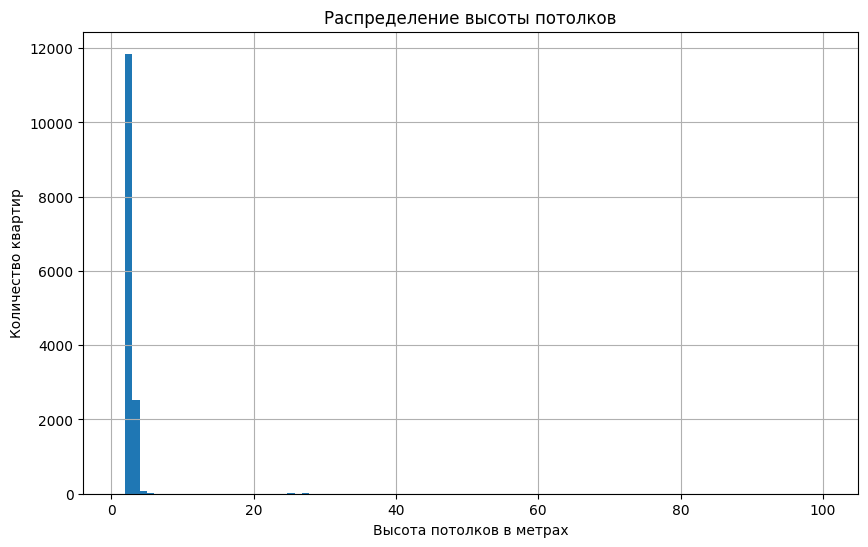

In [18]:
data.hist('ceiling_height', bins=100, figsize=(10, 6))
plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолков в метрах')
plt.ylabel('Количество квартир')
plt.show()

**2.9** Также применим к столбцу метод `describe()`, чтобы посмотреть статистику о данных.

In [19]:
data['ceiling_height'].describe()

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

**2.10** Из гистограммы мы видим, что большинство квартир имеют высоту потолков от 2 до 4 метров. При этом 75% квартир или более имеют высоту до 2,8 метров. 

Также небольшое количество квартир имеет высоту потолков до 5 метров. Учитывая специфику питерских построек, можно предположить, что квартиры могут иметь высоту более 4 метров. Проверим, сколько квартир в данных имеют полотки от 4 до 5 метров.

In [21]:
print(data.query('4 <= ceiling_height <= 5')['ceiling_height'].count())

77


**2.11** Также проверим, сколько квартир имеют высоту потолков **более** 4 метров.

In [22]:
print(data.query('ceiling_height > 4')['ceiling_height'].count())

75


**2.12** Итак, 77 квартир имеют высоту потолков от 4 до 5 метров. Всего квартир с потолками выше 4 метров оказалось 75 штук. Эти данные незначительные, можно заменить их медианными.

Теперь разберёмся с низкими потолками. Проверим распределение квартир на гистрограмме с высотой потолков до 3 метров. 

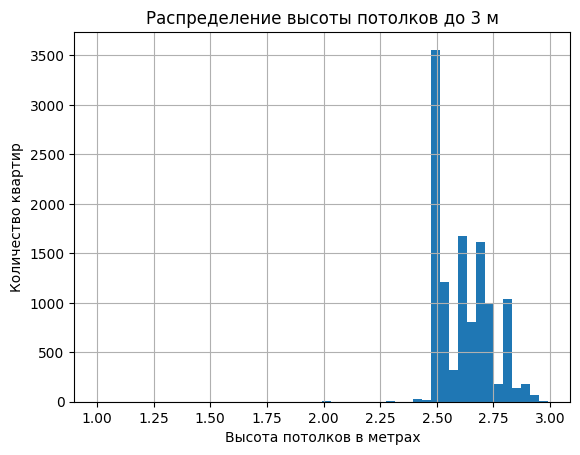

In [24]:
data.query('ceiling_height < 3')['ceiling_height'].hist(bins=50)
plt.title('Распределение высоты потолков до 3 м')
plt.xlabel('Высота потолков в метрах')
plt.ylabel('Количество квартир')
plt.show()

**2.13** Мы видим, что пик приходится на квартиры с высотой потолков около 2,5 метров. Посмотрим, сколько квартир имеет меньшую высоту.

In [25]:
data.query('ceiling_height < 2.5')['ceiling_height'].count()

np.int64(73)

**2.14** 73 квартиры — это несущественный объём данных, к тому же в этом срезе явно есть аномальные значения типа 1 метра. Предлагаем заменить высоту потолков в этих квартирах медианными значениями. 

Итак, мы определились, что считаем объективной высоту потолков от 2,5 до 4 метров. Остальные данные надо заменить медианными значениями этого интервала, так как, скорее всего, они содержат ошибочные показатели.

In [26]:
ceiling_height_median = data.query('2.5 <= ceiling_height <= 4')['ceiling_height'].median()

In [27]:
for t in data['ceiling_height'].unique():
    data.loc[(data['ceiling_height'] == t) & (data['ceiling_height'] < 2.5) | (data['ceiling_height'] > 4), \
             'ceiling_height'] = ceiling_height_median

        

**2.15** Проверяем, заменились ли данные.

In [28]:
data['ceiling_height'].describe()

count    14490.000000
mean         2.721801
std          0.255729
min          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
max          4.000000
Name: ceiling_height, dtype: float64

**2.16** Также медианными данными заменим все пропуски в столбце `ceiling_height`. 

Скорее всего, тип постройки зависит от населённого пункта. Поэтому мы сгруппируем данные по столбцу `locality_name` и заменим пропуски медианой высоты потолков в каждом из населённых пунктов.

Может быть такое, что в населённом пункте нет данных о высоте потолков ни в одной из квартир, поэтому предварительно заменим все пропуски в столбце `ceiling_height` на 0. Чтобы код для замены данных медианным значением не выдал ошибку. 

In [29]:
data['ceiling_height'] = data['ceiling_height'].fillna(0)

In [30]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['ceiling_height'] == 0), 'ceiling_height'] = \
    data.loc[(data['locality_name'] == t) & (data['ceiling_height'] != 0), 'ceiling_height'].median()

**2.17** Проверим, остались ли у нас нули и пропущенные значения.

In [31]:
data['ceiling_height'].describe()

count    23550.000000
mean         2.700218
std          0.206627
min          2.500000
25%          2.550000
50%          2.700000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

In [33]:
print(data['ceiling_height'].isna().sum())

100


**2.18** Нулей не осталось, но вот пропуски появились вновь. Так как их мало, заменим их на общее медианное значение среза, полученное нами в начале.

In [34]:
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = ceiling_height_median

In [35]:
data['ceiling_height'].describe()

count    23650.000000
mean         2.700006
std          0.206215
min          2.500000
25%          2.550000
50%          2.700000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

In [37]:
print(data['ceiling_height'].isna().sum())

0


**2.19 Теперь проведём работу со столбцом `balcony`**. 

Проверим, какие данные в нём содержатся. 

In [38]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

**2.20** Здесь содержатся целые числа, отражающие количество балконов. Логично предположить, что отсутствующие значения указывают на отсутствие балконов. Заменим все пропущенные значения нулями. 

Также переведём тип столбца в `int`, так как здесь могут быть только целые числа.

In [39]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

**2.21** Проверям проделанную работу.

In [40]:
data['balcony'].unique()

array([0, 2, 1, 5, 4, 3])

**2.22 Проверим, можно ли заменить пропуски в столбце `is_apartment`**. 

Выведем на экран уникальные значения. 

In [41]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

**2.23** В столбце указаны значения True и False. Логично предположить, что это булевый столбец и отсутствующее значение означает False. Заменим все пропуски на False. 

In [43]:
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False

**2.24 Теперь заполним пропуски в столбцах `living_area` и `kitchen_area`.**

Сначала разберёмся с `kitchen_area`. К сожалению, исходя из таблицы, размер кухни почти не зависит от общей площади недвижимости и населённого пункта. Например, есть две питерские квартиры: в первой при общей площади в 61 м кухня занимает 6.5 м, а во второй при общей площади в 39.6 метров кухня составляет 8.5 м.

Поэтому нет смысла группировать и категоризировать данные. Просто найдём общую среднюю долю кухни и заменим все пропуски, умножив `total_area` на среднюю долю. 

In [45]:
kitchen_area_avg = (data['kitchen_area'] / data['total_area']).mean()
print(kitchen_area_avg)

0.18737152810064503


In [46]:
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data.loc[data['kitchen_area'].isna()]['total_area'] * kitchen_area_avg

**2.25** Теперь нам нужно заполнить пропуски в `living_area`. Так как кухня, исходя из таблицы, может занимать и 10%, и 40%, предлагаем найти среднюю долю жилой площади от общей, исключая площадь кухни. Так предположительно будут более объективные данные, так как оставшаяся нежилая площадь (ванные комнаты, балконы, прихожие) обычно не имеет такой разброс площади, как у кухни. 

In [47]:
area_share_avg = (data['living_area'] / (data['total_area'] - data['kitchen_area'])).mean()
print(area_share_avg)

0.692147598190476


**2.26** Найдём общую площадь без кухни для всех столбцов. 

In [48]:
data['area_without_kitchen'] = data['total_area'] - data['kitchen_area']

**2.27** Вычислим жилую площадь для всех пропущенных значений. 

In [49]:
data.loc[data['living_area'].isna(), 'living_area'] = \
data.loc[data['living_area'].isna()]['area_without_kitchen'] * area_share_avg

**2.28** Выведем на экран первые 15 строк столбцов с площадью.

In [50]:
data[['total_area', 'living_area', 'kitchen_area']].head(15)

,total_area,living_area,kitchen_area
0,108.00,51.000000,25.000000
1,40.40,18.600000,11.000000
2,56.00,34.300000,8.300000
3,159.00,89.430956,29.792073
4,100.00,32.000000,41.000000
5,30.40,14.400000,9.100000
6,37.30,10.600000,14.400000
7,71.60,36.476178,18.900000
8,33.16,15.430000,8.810000
9,61.00,43.600000,6.500000


**2.29** Данные похожи на реалистичные. 

Теперь ещё раз выведем количество пропусков в каждом из столбов, чтобы проверить, что мы заполнили все возможные пропуски. 

In [51]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
area_without_kitchen        0
dtype: int64

**2.30** Мы заполнили все возможные пропуски. **Теперь разберёмся с типами данных.** 

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest      18

**2.31** Заменим типы данных в следующих столбцах: 

`first_day_exposition` — заменим `object` на `datetime`, так как тип `object`не позволяет выполнять операции с датами.

`is_apartment` — заменим `object` на `bool`, так как в столбце явно содержится булевый тип данных.

Выведем первые 5 строк таблицы для работы.

In [53]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_without_kitchen
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,83.000000
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.63,11.0,18.600000,1,False,...,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,29.400000
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.70,5.0,34.300000,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,47.700000
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14.0,89.430956,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,129.207927
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,59.000000


In [54]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

data['is_apartment'] = data['is_apartment'].astype('bool')


**2.32** Финальная проверка данных.

In [55]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_without_kitchen
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,83.000000
1,7,3350000.0,40.4,2018-12-04,1,2.63,11.0,18.600000,1,False,...,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,29.400000
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.300000,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,47.700000
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,89.430956,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,129.207927
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,59.000000


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony              

**2.33 Вывод по предобработке:**

В рамках проведённой работы были **ликвидированы пропуски** в следующих столбцах: 
- `locality_name` — удалены строки с пропусками (их было незначительное количество).
- `kitchen_area` и `living_area` — пропуски заполнены средней долей от общей прощади каждой недвижимости.
- `ceiling_height` — пропуски заполнены медианным значением, группированным по `locality_name` (где это возможно).
- `is_apartment` — пропуски заменены на `False`.
- `balcony` — пропуски заменены на 0 (отсутствие балконов).

Также были удалены **неявные дубликаты** в столбце `locality_name`.

И **заменены типы данных** в следующих столбцах:

- `first_day_exposition` — тип `object` на `datetime`.

- `is_apartment` — тип `object` на `bool`.

- `balcony` — тип `float` на `int`.

<a id="3"></a>
##  Добавление в таблицу новых столбцов

**3.1** Добавим столбец `price_per_meter`, в котором будет указана цена одного квадратного метра.

In [57]:
data['price_per_meter'] = round(data['last_price'] / data['total_area'], 2)

**3.2** Добавим столбец `weekday` с днём недели публикации объявления, где 0 — понедельник, 1 — вторник и так далее.

In [58]:
data['weekday'] = data['first_day_exposition'].dt.weekday

**3.3** Добавим столбец `month_exposition`, где будет указан месяц публикации объявления.

In [59]:
data['month_exposition'] = data['first_day_exposition'].dt.month

**3.4** Добавим столбец `year_exposition`, где будет указан год публикации объявления.

In [60]:
data['year_exposition'] = data['first_day_exposition'].dt.year

**3.5** Добавим столбец `type_floor`, который будет содержать тип этажа квартиры («первый», «последний», «другой»). 

Для этого напишем функцию, которая будет возвращать нужные нам значения. 

In [61]:
def type_floor(raw):
    try:
        if raw['floor'] == 1:
            return 'первый'
        elif raw['floor'] == raw['floors_total']:
            return 'последний'
        else:
            return 'другой' 
    except:
        return 'другой'

In [62]:
data['type_floor'] = data.apply(type_floor, axis=1)

**3.6** Добавим столбец `cityCenters_nearest_km`, где будет указано расстояние до центра города в километрах.

In [63]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000)

**3.7** Проверяем, все ли столбцы добавились и содержат верную информацию.

In [64]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,area_without_kitchen,price_per_meter,weekday,month_exposition,year_exposition,type_floor,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,2.0,755.0,NaN,83.000000,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.63,11.0,18.600000,1,False,...,0.0,NaN,81.0,29.400000,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.300000,4,False,...,2.0,574.0,558.0,47.700000,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,89.430956,9,False,...,3.0,234.0,424.0,129.207927,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,1.0,48.0,121.0,59.000000,100000.00,1,6,2018,другой,8.0


<a id="4"></a>
## Исследовательский анализ данных

**4.1** Изучим подробнее некоторые столбцы датафрейма на предмет распределения данных и наличия аномальных значений. 

Начнём с общей площади недвижимости: `total_area`.

In [65]:
data['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

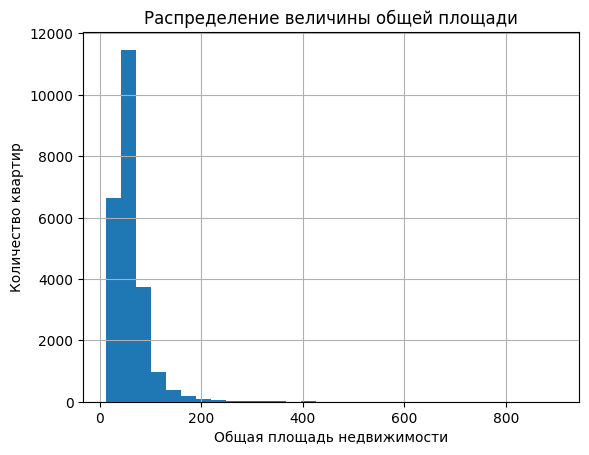

In [67]:
data.hist('total_area', bins=30)
plt.title('Распределение величины общей площади')
plt.xlabel('Общая площадь недвижимости')
plt.ylabel('Количество квартир')
plt.show()

**4.2** Видно, что в данных есть аномально высокие значения (вплоть до 900 метров), которые могут искажать данные. Попробуем ограничить график до 300, чтобы посмотреть распределение данных в этом диапазоне.

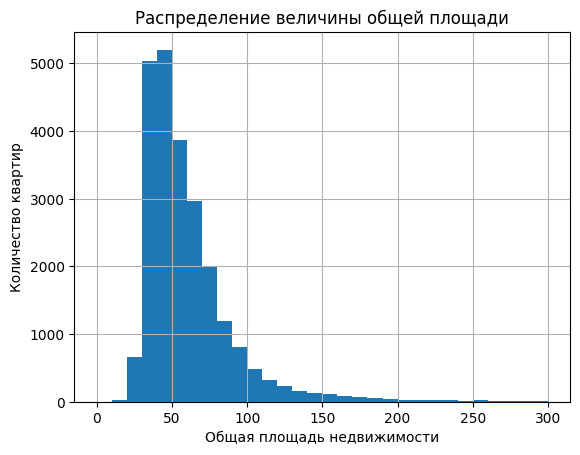

In [68]:
data.hist('total_area', bins=30, range=(0, 300))
plt.title('Распределение величины общей площади')
plt.xlabel('Общая площадь недвижимости')
plt.ylabel('Количество квартир')
plt.show()

**4.3** Также построим диаграмму размаха, чтобы определить "усы". 

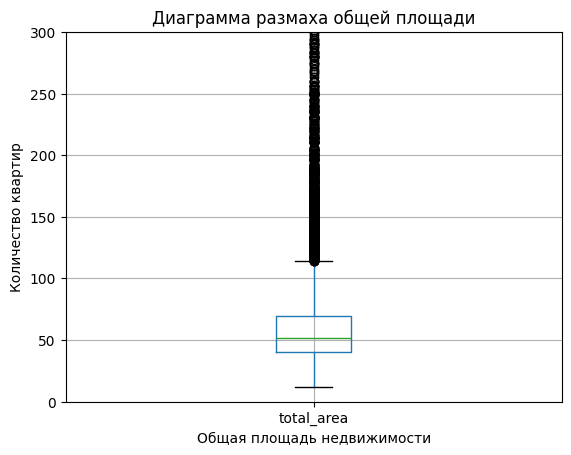

In [69]:
data[['total_area', 'locality_name']].boxplot()
plt.ylim(0, 300)
plt.title('Диаграмма размаха общей площади')
plt.xlabel('Общая площадь недвижимости')
plt.ylabel('Количество квартир')
plt.show()

**4.4** По графикам видно, что характерный размах должен быть приблизительно от 15 до 125 м. 

Предлагаем убрать из датафрейма значения меньше 15 метров (площадь студий начинается в среднем от 15 м) и больше 150 метров.

In [70]:
data = data.query('15 <= total_area <= 150')

**4.5** Повторно выведем гистограмму.

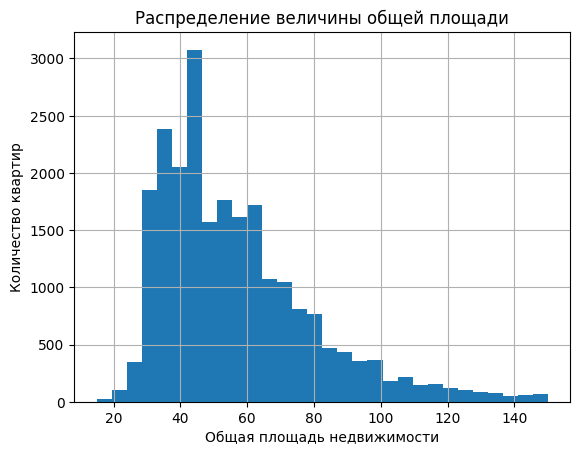

In [72]:
data.hist('total_area', bins=30)
plt.title('Распределение величины общей площади')
plt.xlabel('Общая площадь недвижимости')
plt.ylabel('Количество квартир')
plt.show()

**4.6** Мы избавились от выбросов. 

Теперь рассмотрим столбец `living_area` с жилой площадью недвижимости. 

In [73]:
data['living_area'].describe()

count    23082.000000
mean        32.299641
std         15.289618
min          2.000000
25%         18.700000
50%         30.000000
75%         41.100000
max        128.000000
Name: living_area, dtype: float64

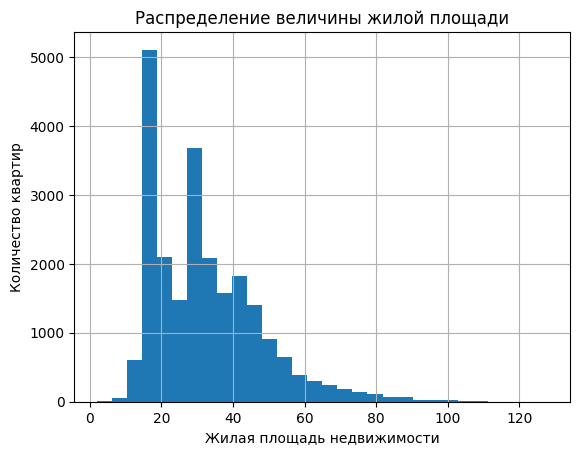

In [74]:
data.hist('living_area', bins=30)
plt.title('Распределение величины жилой площади')
plt.xlabel('Жилая площадь недвижимости')
plt.ylabel('Количество квартир')
plt.show()

**4.7** В целом у этого столбца нет сильного разброса данных, однако вряд ли жилая площадь может составлять 2 метра (даже при учёте начилия студий в 15 кв. м.). Также подозрительной является жилая площадь более 100 метров, если максимальная общая площадь недвижимости составляет 150 кв. м.

Ограничим выборку от 10 до 90 кв. м (за этими пределами значений очень мало). 

In [75]:
data = data.query('10 <= living_area <= 90')

**4.8** Проверяем полученный срез.

В дальшейшем повторно выводить гистограмму для проверки изменений в каждом столбце не будем, выведем все гистограммы после обработки всех столбцов.

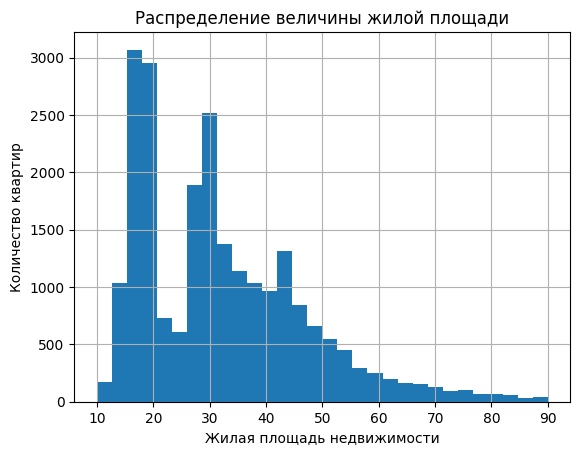

In [77]:
data.hist('living_area', bins=30)
plt.title('Распределение величины жилой площади')
plt.xlabel('Жилая площадь недвижимости')
plt.ylabel('Количество квартир')
plt.show()

**4.9** Выведем столбец `kitchen_area`, который содержит данные о площади кухни.

In [78]:
data['kitchen_area'].describe()

count    22958.000000
mean        10.122331
std          4.896046
min          1.300000
25%          7.000000
50%          9.000000
75%         11.600000
max         93.000000
Name: kitchen_area, dtype: float64

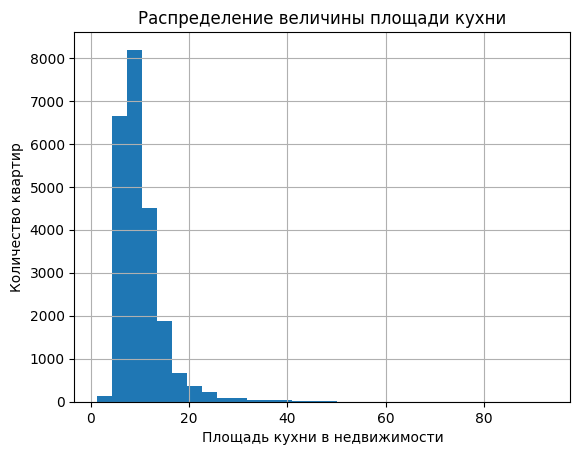

In [79]:
data.hist('kitchen_area', bins=30)
plt.title('Распределение величины площади кухни')
plt.xlabel('Площадь кухни в недвижимости')
plt.ylabel('Количество квартир')
plt.show()

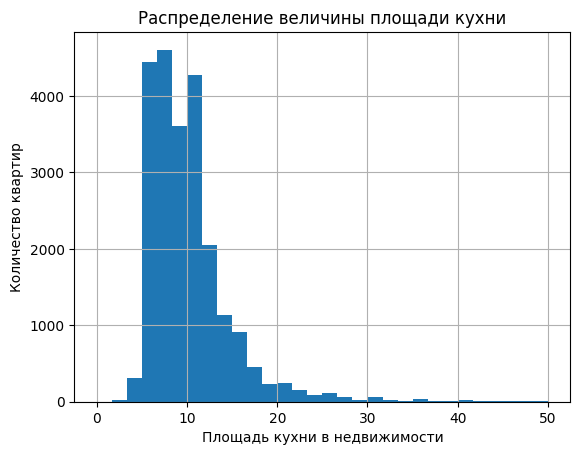

In [81]:
data.hist('kitchen_area', bins=30, range=(0, 50))
plt.title('Распределение величины площади кухни')
plt.xlabel('Площадь кухни в недвижимости')
plt.ylabel('Количество квартир')
plt.show()

**4.10** Учитывая наши знания об общей и жилой площадях квартир, предположим, что кухни могут достигать 40 метров при учёте квартир площадью 150 кв. м. Также нижним порогом предлагаем сделать 3 кв. м., учитывая специфику студий. 

In [82]:
data = data.query('3 <= kitchen_area <= 40')

**4.11** Проверяем столбец `last_price`, в котором лежит цена продажи объекта. 

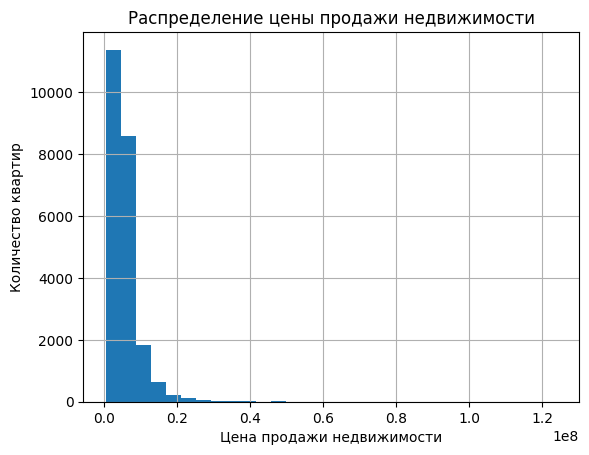

In [83]:
data.hist('last_price', bins=30)
plt.title('Распределение цены продажи недвижимости')
plt.xlabel('Цена продажи недвижимости')
plt.ylabel('Количество квартир')
plt.show()

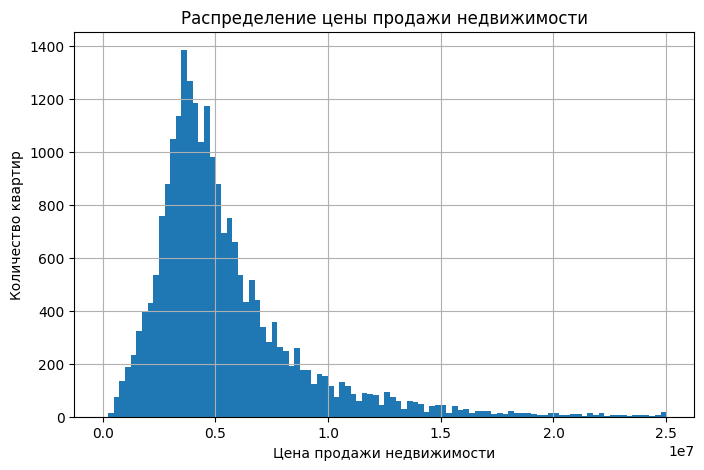

In [84]:
data.hist('last_price', bins=100, range=(0, 25000000), figsize=(8, 5))
plt.title('Распределение цены продажи недвижимости')
plt.xlabel('Цена продажи недвижимости')
plt.ylabel('Количество квартир')
plt.show()

**4.12** Ограничим данные 25 000 000 сверху и хотя бы 1 000 000 снизу, так как на графике видно, что достаточно много значений стремится к нулю. Возможно, недвижимость в деревнях стоит недорого. 

In [85]:
data = data.query('1000000 <= last_price <= 25000000')

**4.13** Проверим столбец с количеством комнат: `rooms`.

In [86]:
data['rooms'].describe()

count    22512.000000
mean         1.986452
std          0.934933
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

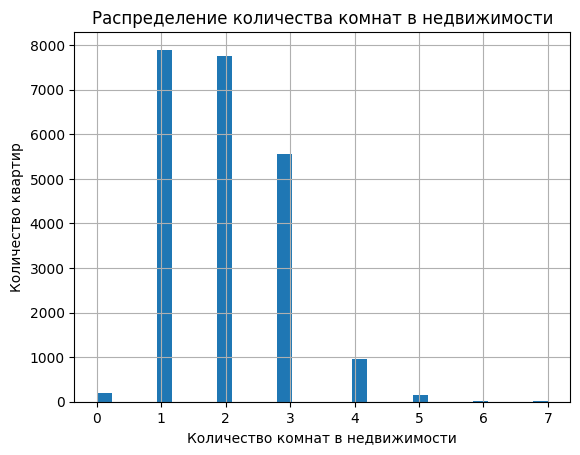

In [87]:
data.hist('rooms', bins=30)
plt.title('Распределение количества комнат в недвижимости')
plt.xlabel('Количество комнат в недвижимости')
plt.ylabel('Количество квартир')
plt.show()

**4.14** Удалим редкие значения: 6 и 7 комнат. 0 комнат можно не считать аномальным значением, так как в выборке присутствуют студии, у которых нет комнат как таковых. 

In [88]:
data = data.query('rooms <= 5')

**4.15** Проверяем столбец `ceiling_height`, содержащий высоту потолков. 

In [89]:
data['ceiling_height'].describe()

count    22491.000000
mean         2.689314
std          0.189857
min          2.500000
25%          2.550000
50%          2.700000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

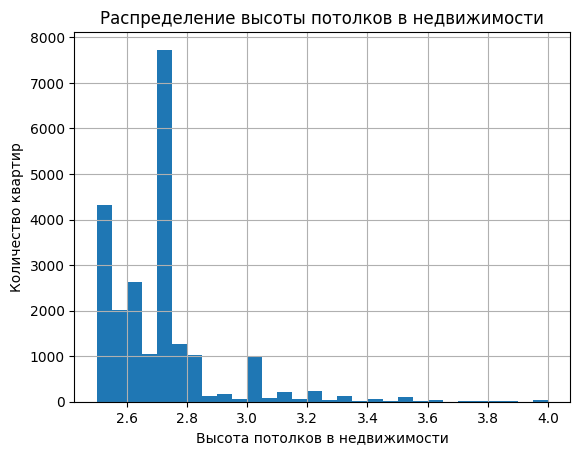

In [90]:
data.hist('ceiling_height', bins=30)
plt.title('Распределение высоты потолков в недвижимости')
plt.xlabel('Высота потолков в недвижимости')
plt.ylabel('Количество квартир')
plt.show()

**4.16** Этот стоблец мы уже обрабатывали во 2-м пункте, так что оставим его в таком виде.

Проверяем столбец `type_floor`, который содержит тип этажа квартиры. Так как значения нечисловые, применим к столбцу группировку, а потом уже построим график.

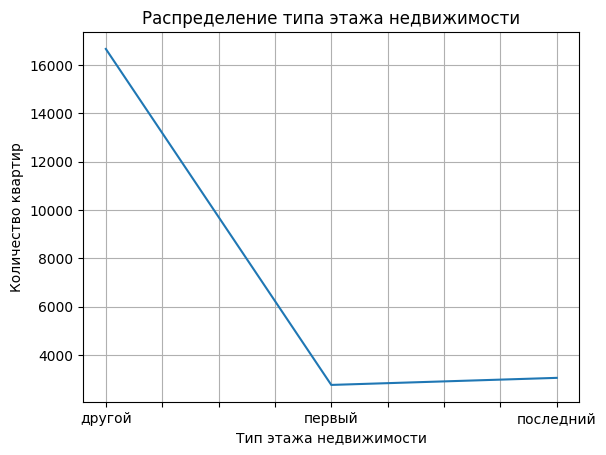

In [91]:
data.groupby('type_floor')['type_floor'].count().plot(grid=True)
plt.title('Распределение типа этажа недвижимости')
plt.xlabel('Тип этажа недвижимости')
plt.ylabel('Количество квартир')
plt.show()

**4.17** Данные выглядят правдоподобно. "Других" этажей намного больше, чем первых и последних. И в то же время первые и последние этажи присутствуют в выборке примерно в равных долях. Оставляем данные в таком виде. 

Теперь проверим распределение общего количества этажей в домах: `floors_total`.

In [92]:
data['floors_total'].describe()

count    22408.000000
mean        10.848447
std          6.629001
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

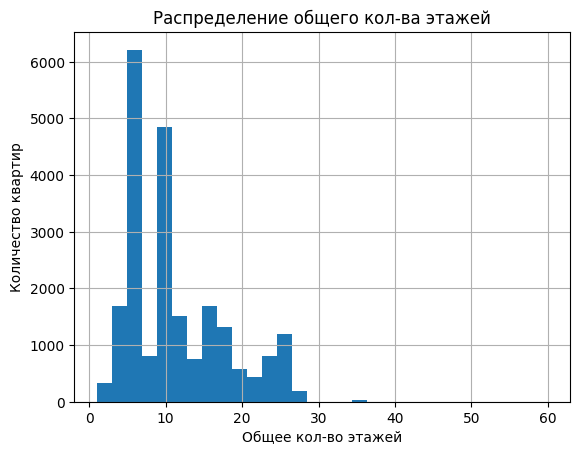

In [93]:
data.hist('floors_total', bins=30)
plt.title('Распределение общего кол-ва этажей')
plt.xlabel('Общее кол-во этажей')
plt.ylabel('Количество квартир')
plt.show()

**4.18** На гистограмме видно, что подавляющее большинство домов имеет до 28 этажей. Можно было бы ограничить выборку до 30 этажей, однако этажность дома не будет важна для дальнейших исследований, поэтому предлагаем не исключать строки из датафрейма по этому столбцу, так как в других столбцах этих строк может содержаться полезная информация.

Проверим столбец `cityCenters_nearest`, содержащий информацию о расстоянии до центра города в метрах.

In [94]:
data['cityCenters_nearest'].describe()

count    17233.000000
mean     14560.328033
std       8546.732976
min        208.000000
25%       9932.000000
50%      13302.000000
75%      16470.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

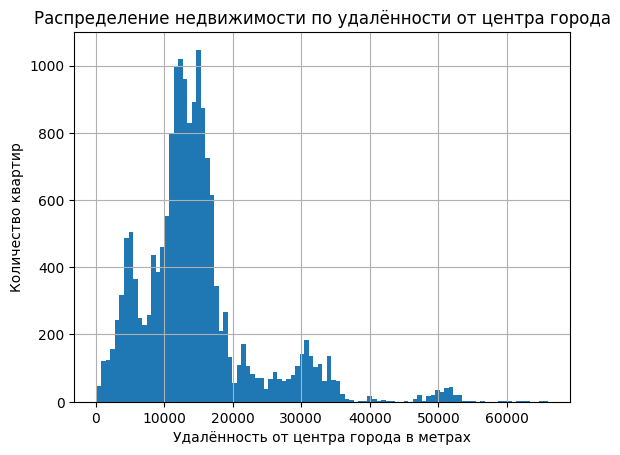

In [95]:
data.hist('cityCenters_nearest', bins=100)
plt.title('Распределение недвижимости по удалённости от центра города')
plt.xlabel('Удалённость от центра города в метрах')
plt.ylabel('Количество квартир')
plt.show()

**4.19** Мы видим, что после 36 000 м данных достаточно мало. Однако есть небольшой всплеск в районе 50 000 м. Скорее всего, если мы ограничим данные 36 000 м, то потеряем информацию о недвижимости в нескольких относительно крупных населённых пунктах. Поэтому не будем сильно ограничивать данные, поставив верхнюю груницу в 53 000 м.

Нижнюю границу ставить не будем, ведь квартира может располагаться прямо в центре города. 

In [96]:
data = data.query('cityCenters_nearest <= 53000')

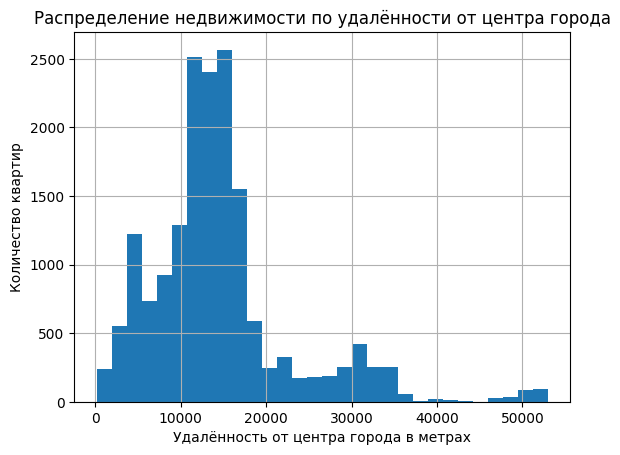

In [98]:
data.hist('cityCenters_nearest', bins=30)
plt.title('Распределение недвижимости по удалённости от центра города')
plt.xlabel('Удалённость от центра города в метрах')
plt.ylabel('Количество квартир')
plt.show()

**4.20** Построим гистограмму для столбца `parks_nearest`, который содержит расстояние до ближайшего парка в метрах.

In [99]:
data['parks_nearest'].describe()

count    7433.000000
mean      496.405489
std       344.133187
min         1.000000
25%       292.000000
50%       458.000000
75%       618.000000
max      3190.000000
Name: parks_nearest, dtype: float64

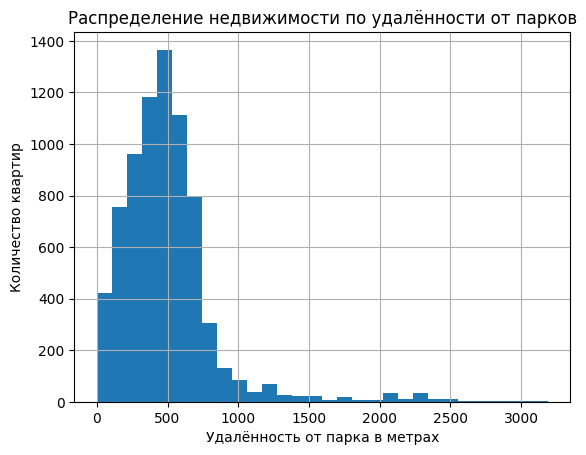

In [100]:
data.hist('parks_nearest', bins=30)
plt.title('Распределение недвижимости по удалённости от парков')
plt.xlabel('Удалённость от парка в метрах')
plt.ylabel('Количество квартир')
plt.show()

**4.21** Видно, что подавляющее большинство недвижимости расположилось в пределах 1500 м от парков. Однако столбец `parks_nearest` не будет участвовать в дальнейшем исследовании, к тому же все значения, представленные здесь, могут быть верными, поэтому нет весомых причин сокращать таблицу по этим данным.

Выведем гистограммы для всех числовых столбцов после обработки данных.

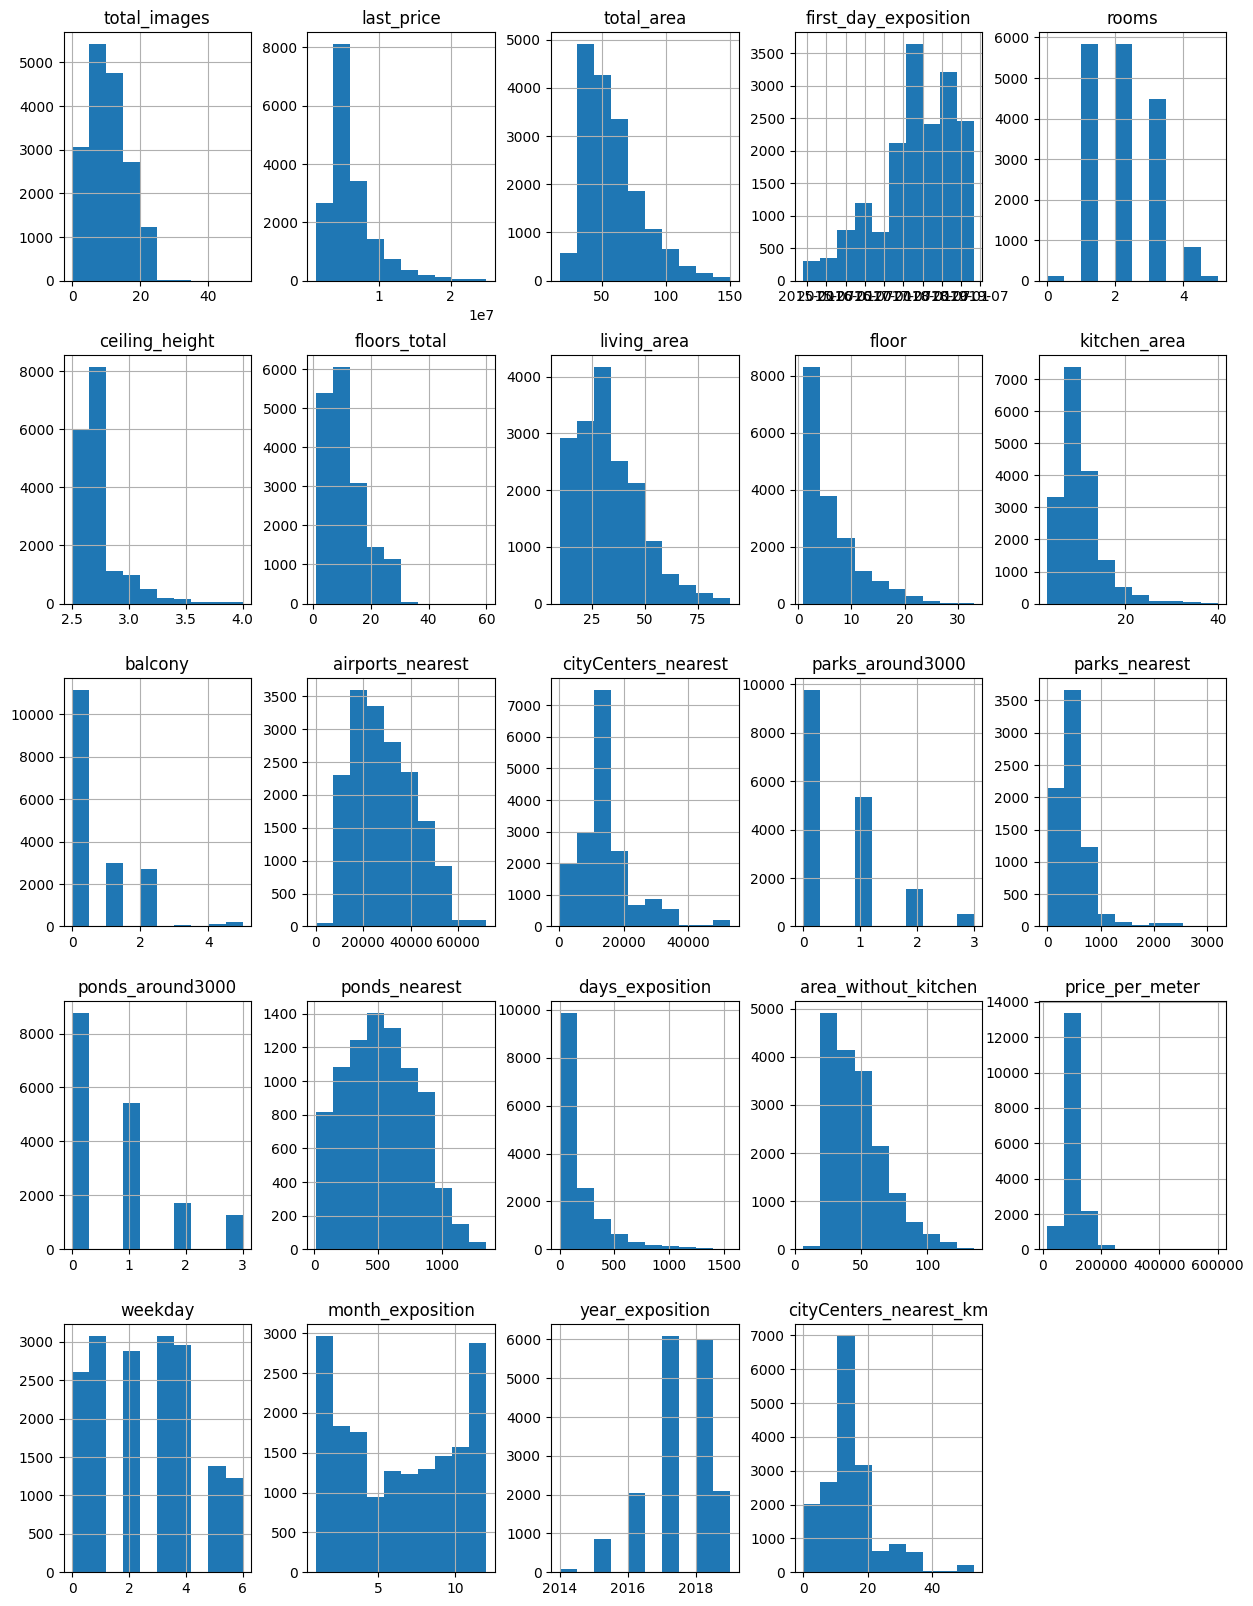

In [101]:
data.hist(figsize=(15, 20))
plt.show()

**4.22** Теперь данные не имеют экстремальных значений в нужных нам столбцах и можно проводить дальнейшую работу. 

Напоследок переиндексируем получившийся датафрейм. 

In [102]:
data = data.reset_index(drop=True)

**4.23** Изучим, как быстро продавались квартиры. Столбец `days_exposition` показывает, сколько дней было размещено каждое объявление.

Построим гистограмму, а также выведем числовые характеристики, дающие представление о выборке.

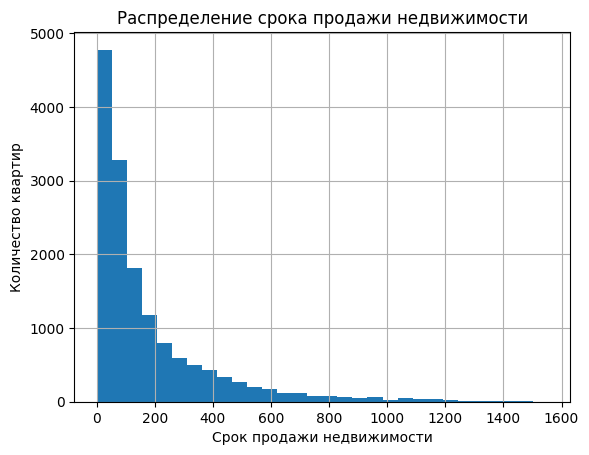

In [103]:
data.hist('days_exposition', bins=30)
plt.title('Распределение срока продажи недвижимости')
plt.xlabel('Срок продажи недвижимости')
plt.ylabel('Количество квартир')
plt.show()

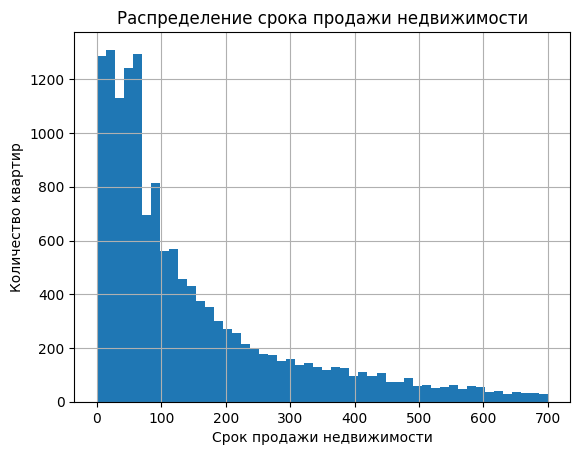

In [104]:
data.hist('days_exposition', bins=50, range=(0, 700))
plt.title('Распределение срока продажи недвижимости')
plt.xlabel('Срок продажи недвижимости')
plt.ylabel('Количество квартир')
plt.show()

In [105]:
data['days_exposition'].describe()

count    15133.000000
mean       177.354854
std        217.980734
min          1.000000
25%         42.000000
50%         93.000000
75%        224.000000
max       1553.000000
Name: days_exposition, dtype: float64

**4.24 Промежуточный вывод:**

**На графиках видно, что большинство квартир находилось в продаже до 100 дней. Это нам показывает и медиана, равная 93 дням.**

**Однако в данных есть экстремально высокие значения. Например, есть квартиры, которые продавались 3-4 года. О наличии выбросов говорит и среднее значение, которое равно 177 дням при медиане в 93 дня.**

**По данным можно сделать следующие выводы:**

- **Более половины квартир продаётся в пределах 100 дней.** 
- **Если квартира продалась в период до 42 дней, это можно назвать быстрой продажей: только 25% продалось за столько дней.**
- **25% квартир были размещены на продаже более полугода (от 224 дней), при этом достаточное количество продавалось 1-2 года — это можно считать долгой продажей.**
- **Отдельные квартиры продавались 2-4 года. По небольшому количеству данных можно сделать вывод, что это аномально долгие продажи, которые нельзя рассматривать как типичные.** 

**4.25 Теперь изучим, какие факторы больше всего влияют на стоимость объекта.** 

Сперва изучим, зависит ли цена от общей площади недвижимости: `total_area`. Построим диаграмму рассеяния, чтобы визуализировать эту зависимость.

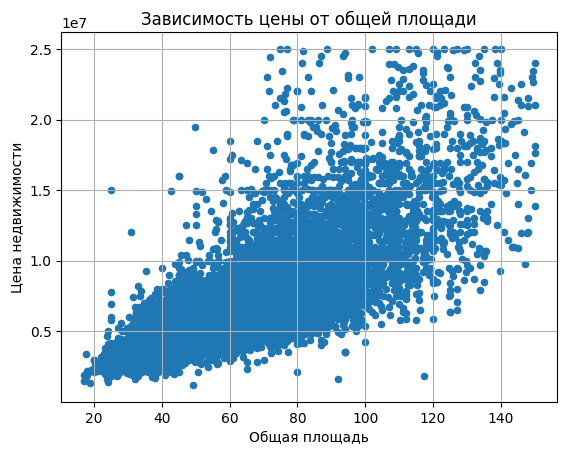

In [106]:
data.plot(x='total_area', y='last_price', grid=True, kind='scatter')
plt.title('Зависимость цены от общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Цена недвижимости')
plt.show()

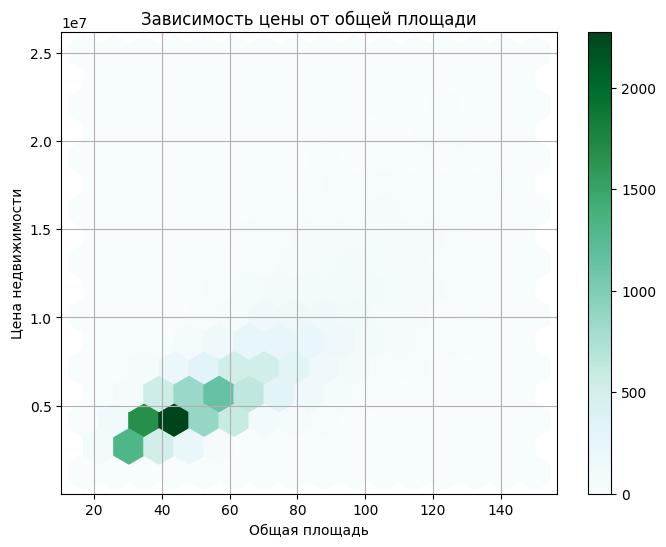

In [107]:
data.plot(x='total_area', y='last_price', kind='hexbin', gridsize=15, figsize=(8, 6), sharex=False, grid=True)
plt.title('Зависимость цены от общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Цена недвижимости')
plt.show()

**4.26** На графике сверху видна явная зависимость цены квартиры от её общей площади. При этом мы видим, что чёткая зависимость сохраняется для квартир до 70 метров, после чего цены за один и тот же метраж могут разительно отличаться.

Также на графике "с сотами" видно, что основная масса объектов имеет примерную площадь от 25 до 60 метров (где у нас нет сильного ценового разброса). Из этого сделаем вывод: **да, общий метраж недвижимости напрямую влияет на её стоимость.**

*Отметим, что самый яркий сектор графика — объекты в районе 38-45 метров стоимостью 4-5 млн.*

Подсчитаем коэффициент корреляции Пирсона, чтобы подтвердить свои выводы.

In [109]:
print(data['total_area'].corr(data['last_price']))

0.7981589222997554


**4.27** 0,8 — это очень высокий коэффициент, что подтверждает наши выводы.

Проведём те же расчёты для столбца `living_area`, чтобы посмотреть зависимость цены от жилой площади недвижимости. 

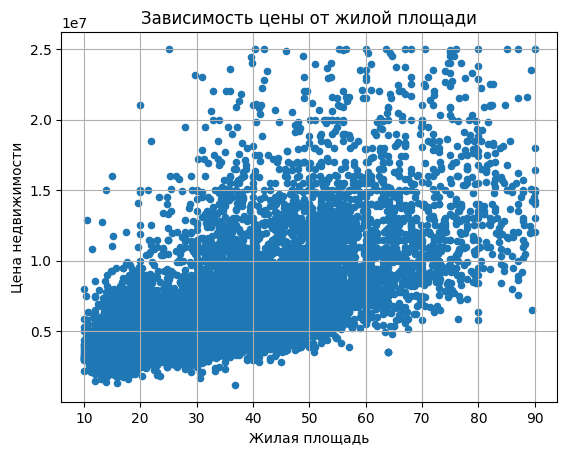

In [110]:
data.plot(x='living_area', y='last_price', grid=True, kind='scatter')
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена недвижимости')
plt.show()

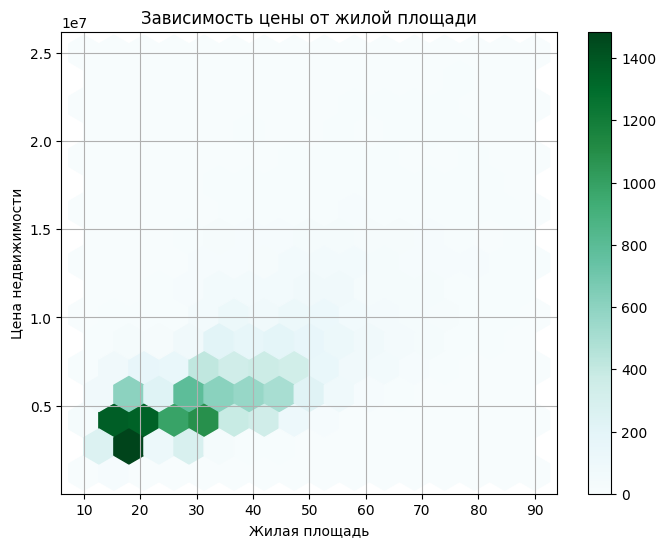

In [111]:
data.plot(x='living_area', y='last_price', kind='hexbin', gridsize=15, figsize=(8, 6), sharex=False, grid=True)
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена недвижимости')
plt.show()

In [112]:
print(data['living_area'].corr(data['last_price']))

0.6793992332295772


**4.28** На первой диаграмме рассеяния также видно прямую зависимость цены от жилой площади недвижимости, однако сильный ценовой разброс начинается раньше (относительно графика с общей площадью). Достаточно сильные ценовые различия начинаются уже с 35-40 кв. м. Скорее всего, такой разброс цен обусловлен тем, что у каждой квартиры имеется и нежилая площадь, которая может занимать как 20%, так и 50% от общей площади квартиры. А цена недвижимости складывается как из жилой, так и из нежилой площади.

Опять же, на графике "с сотами" мы видим, что основной объём данных занимают объекты до 35 кв. м., где разброс цен минимальный. Поэтому делаем вывод: **да, цена недвижимости зависит от жилой площади квартиры (что подтверждает и коэффициент Пирсона). Однако немаловажную роль играет и нежилая площадь, из-за чего разброс цен выше, чем в пункте 4.25**. 

**4.29** Проверим зависимость цены от площади кухни `kitchen_area`.

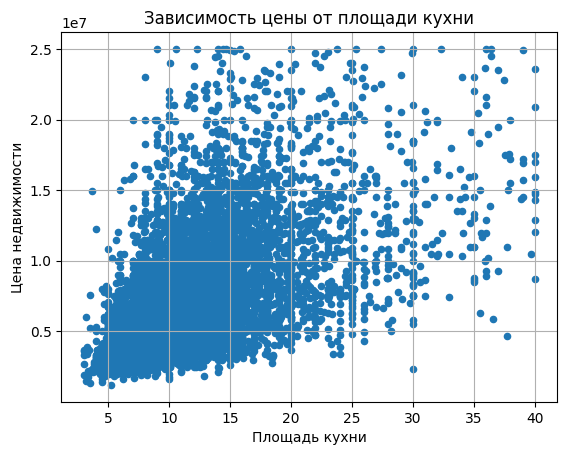

In [113]:
data.plot(x='kitchen_area', y='last_price', grid=True, kind='scatter')
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Цена недвижимости')
plt.show()

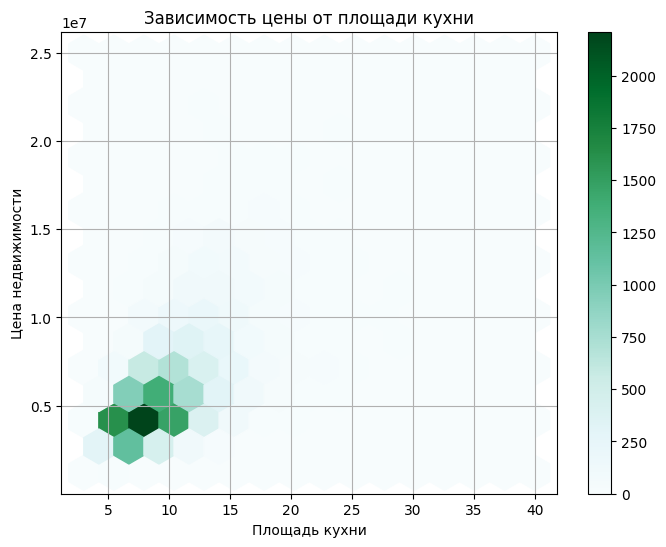

In [114]:
data.plot(x='kitchen_area', y='last_price', kind='hexbin', gridsize=15, figsize=(8, 6), sharex=False, grid=True)
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Цена недвижимости')
plt.show()

In [115]:
print(data['kitchen_area'].corr(data['last_price']))

0.615078390427309


**4.30** Здесь ситуация немного поменясь. Зависимость всё ещё большая (0.61 по коэффициенту Пирсона), однако сильный разброс цен виден уже на кухни от 7-8 метров. Это можно объяснить тем же фактором, что и с жилой площадью: кухня в каждом объекте занимает разный процент от жилой площади. Поэтому метраж кухни не сильно отражает общую площадь недвижимости, из которой складывается стоимость объекта. 

Однако всё равно можно сказать, что **площадь кухни влияет на цену недвижимости**.

*Отметим, что самые многочисленные кластеры с кухнями от 5 до 13 метров, где ценовой разброс невелик.*

**4.31** Рассмотрим зависимость цены от количества комнат в квартире: стобец `rooms`.

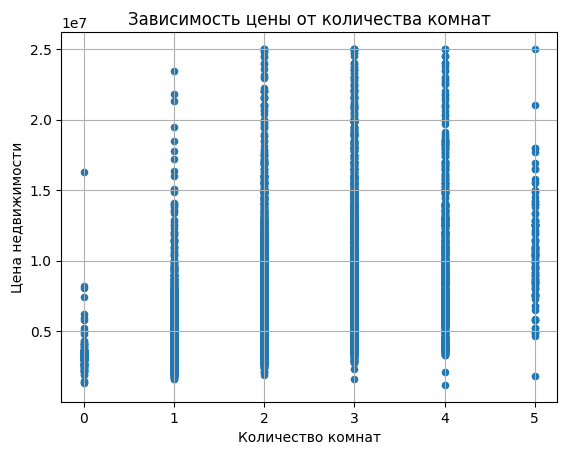

In [116]:
data.plot(x='rooms', y='last_price', grid=True, kind='scatter')
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена недвижимости')
plt.show()

**4.32** Так как по оси `x` у нас находится всего 6 значений, диаграмма рассеяния не является нагладной. Есть некая зависимость цены от комнатности, однако у 2-4-комнатных квартир цены разбросаны по всему дианазону.

Попробуем расчитать зависимость по средней и медианной ценам. Для этого создадим сводную таблицу.

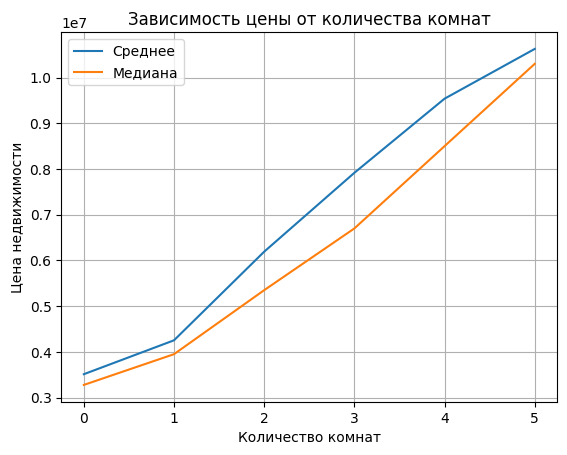

In [117]:
data.pivot_table(index='rooms', values='last_price', aggfunc=['mean', 'median']).plot(y=['mean', 'median'], grid=True)
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена недвижимости')
plt.legend(['Среднее', 'Медиана'])
plt.show()

**4.33** Так данные стали нагляднее. Ко всему прочему посмотри на коэффициент Пирсона.

In [118]:
print(data['rooms'].corr(data['last_price']))

0.4952404544262328


**4.34** Итак, исходя из средних и медианных значений, **есть зависимость между ценой и комнатностью недвижимости. Однако она не такая сильная, как зависимость цены от площади (коэффициент 0.49)**. К тому же на диаграмме рассеяния видно, что **в ряде объектов комнатность не влияет на цену недвижимости**. Скорее всего потому, что комнаты могут быть совершенно разной площади. 

**4.35** Проверим, есть ли зависимость между ценой и этажом, на котором расположена квартира (первый, последний, другой). Скорее всего, здесь опять нужно будет использовать сводную таблицу. Проверим.

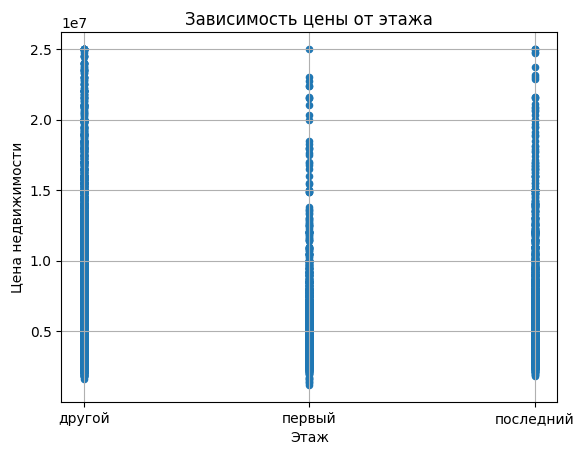

In [119]:
data.plot(x='type_floor', y='last_price', grid=True, kind='scatter')
plt.title('Зависимость цены от этажа')
plt.xlabel('Этаж')
plt.ylabel('Цена недвижимости')
plt.show()

**4.36** Мы видим, что объекты, расположенные на первом этаже, преимущественно имеют меньшую цену, нежели другие. Для более точного анализа, построим сводную таблицу. 

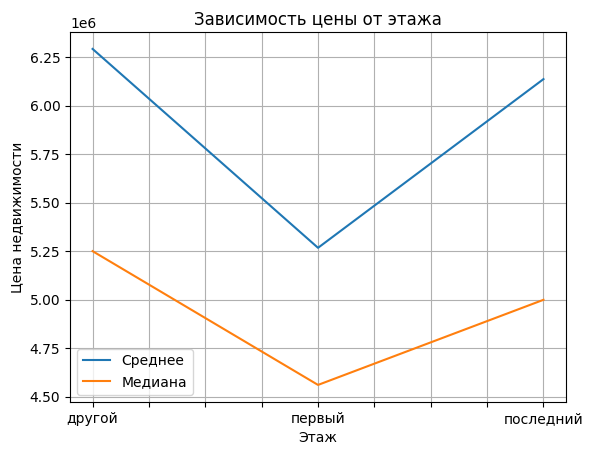

In [120]:
data.pivot_table(index='type_floor', values='last_price', aggfunc=['mean', 'median']).plot(y=['mean', 'median'], grid=True)
plt.title('Зависимость цены от этажа')
plt.xlabel('Этаж')
plt.ylabel('Цена недвижимости')
plt.legend(['Среднее', 'Медиана'])
plt.show()

**4.37** График подтвердил наши выводы: **недвижимость на первом этаже стоит дешевле прочей**. При этом объекты на последнем этаже в среднем стоят чуть дешевле квартир, расположенных на других этажах. Однако это может быть обусловлено тем, что в категории "другой" намного больше данных.

**4.38** Теперь определим зависимость между ценой и датой размещения объекта (день недели, месяц, год): столбцы `weekday`, `month_exposition` и `year_exposition` соответвенно. 

Здесь сразу создадим сводные таблицы, сгрупировав данные по дню недели, месяцу, году, и затем построим графики. 

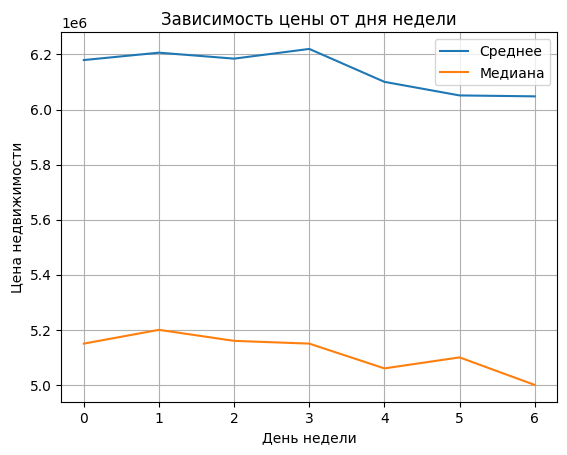

In [121]:
data.pivot_table(index='weekday', values='last_price', aggfunc=['mean', 'median']).plot(y=['mean', 'median'], grid=True)
plt.title('Зависимость цены от дня недели')
plt.xlabel('День недели')
plt.ylabel('Цена недвижимости')
plt.legend(['Среднее', 'Медиана'])
plt.show()

**4.39** Мы видим, что **в `пятницу`, `субботу` и `воскресенье` цена недвижимости несущественно снижается**. Возможно, это связано с тем, что продавцы занижают стоимость к выходным, чтобы мотивировать людей к покупке (в нерабочие дни ажиотаж должен быть выше). 

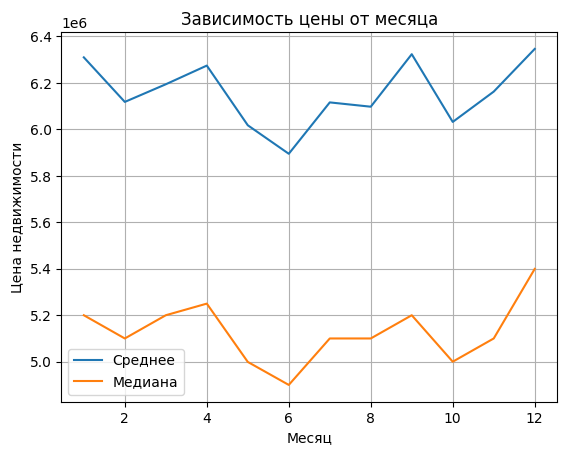

In [122]:
data.pivot_table(index='month_exposition', values='last_price', aggfunc=['mean', 'median']).plot(y=['mean', 'median'], 
grid=True)
plt.title('Зависимость цены от месяца')
plt.xlabel('Месяц')
plt.ylabel('Цена недвижимости')
plt.legend(['Среднее', 'Медиана'])
plt.show()

**4.40** **Цена недвижимости опускается в мае и летние месяцы (в среднем примерно на 200 тысяч)**. При этом июнь — пик низкой цены. Скорее всего, это связано с понижением спроса, так как многие в этот период уезжают отдыхать или переезжают на дачи, не занимаясь важными делами типа покупки недвижимости. Также интересно, что **цена недвижимости в октябре опускается до летних значений**. 

**Самые высокие цены на недвижимость фиксируются в декабре.** 

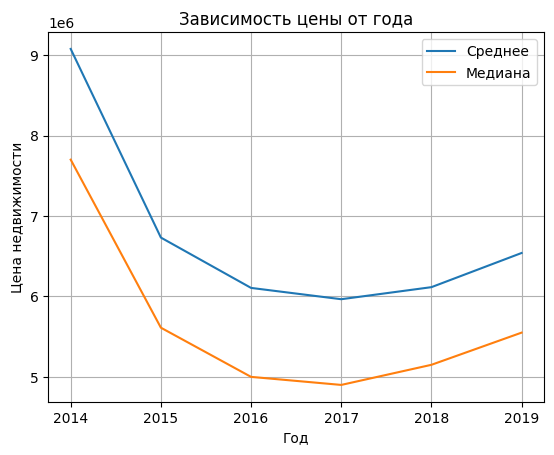

In [123]:
data.pivot_table(index='year_exposition', values='last_price', aggfunc=['mean', 'median']).plot(y=['mean', 'median'], 
grid=True)
plt.title('Зависимость цены от года')
plt.xlabel('Год')
plt.ylabel('Цена недвижимости')
plt.legend(['Среднее', 'Медиана'])
plt.show()

**4.41** За изучаемый период **самые высокие цены наблюдались в 2014 году (в среднем 9 миллионов за объект)**. К 2015 году произошёл резкий спад (в среднем на 2 с лишним миллиона). **Цена падала вплоть до 2017 года (в среднем на 3 миллиона относительно 2014 года)**. 

**Далее наблюдалась тенденция к плавному росту цен на недвижимость**, и в 2019 году средняя цена объекта составляла около 6,5 миллионов. 

Возможная причина — возросшая мода на квартиры-студии и строительство малогабаритных квартиры, которые стоят дешевле недвижимости с большой площадью. 

**4.42 Промежуточный вывод:**
- **Площадь недвижимости напрямую влияет на её цену (меньшее влияние оказывают жилая площадь и площадь кухни, но зависимость всё равно остаётся сильной).**
- **Чем больше комнат, тем выше средняя цена на надвижимость, что, скорее всего, коррелирует с площадью объекта.**
- **Объекты на первом этаже стоят дешевле недвижимости, расположенной на других этажах.**
- **В выходные дни и летние месяцы (а также в октябре) недвижимость стоит дешевле. Декабрь самый доргой месяц.**
- **С 2014 по 2017 год наблюдалось снижение средней цены объекта, с 2017 по 2019 год происходил плавный рост цен.**

**4.43 Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**.

Для начала посчитаем количество объявлений для каждого населённого пункта. Сделаем это с помощью сводной таблицы.

In [124]:
locality_exposition_count = data.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['count', 'mean'])
locality_exposition_count.columns = ['exposition_count', 'mean_price_per_meter']
locality_exposition_count.sort_values(by='exposition_count', ascending=False)

,exposition_count,mean_price_per_meter
locality_name,,
Санкт-Петербург,14792,109693.966240
поселок Шушары,435,78500.032253
Пушкин,351,102203.812365
Колпино,336,75310.879524
поселок Парголово,326,90332.262638
Петергоф,198,84370.517020
Сестрорецк,179,102311.234469
Красное Село,174,72024.346149
Ломоносов,124,72947.605161


**4.44** Теперь создадим переменную с топ-10 населённых пунктов по кол-ву объвляений и отсортируем её по средней цене за квадратный метр. 

In [125]:
top10_locality_exposition = locality_exposition_count.query('exposition_count >= 94')
top10_locality_exposition.sort_values(by='mean_price_per_meter', ascending=False)

,exposition_count,mean_price_per_meter
locality_name,,
Санкт-Петербург,14792,109693.966240
Сестрорецк,179,102311.234469
Пушкин,351,102203.812365
поселок Парголово,326,90332.262638
Петергоф,198,84370.517020
Кронштадт,94,79108.249574
поселок Шушары,435,78500.032253
Колпино,336,75310.879524
Ломоносов,124,72947.605161


**4.45 Самая высокая цена за квадратный метр в Санкт-Петербурге (109,6 тысяч за кв. м.)**, что логично, так как это самый крупный населённый пункт в выборке. Этот же город занимает первое место в списке по количеству объявлений. 

Что интересно, **недвижимость в Сестрорецке и Пушкине стоит незначительно ниже: около 102 тысяч за кв. м.**

Дальше цена страмительно падает вниз. И **в Красном Селе (10-й по стоимости населённый пункт) кв. м. жилья стоит уже 72 тысячи.** 

**4.46** Найдём среднюю цену за кв. м. недвижимости, расположенной в топ-10 населённых пунктов по кол-ву объявлений. 

In [127]:
print(top10_locality_exposition['mean_price_per_meter'].mean())

86680.2905393911


**4.47 Средняя цена кв. м. среди населённых пунктов с наибольшим кол-вом объявлений составляет 86 680.**

Также интересно будет рассмотреть населённые пункты с наименьшей стоимостью за кв. м.

In [128]:
locality_exposition_count = data.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['count', 'mean'])
locality_exposition_count.columns = ['exposition_count', 'mean_price_per_meter']
locality_exposition_count.sort_values(by='mean_price_per_meter')

,exposition_count,mean_price_per_meter
locality_name,,
поселок Александровская,1,63559.320000
поселок Усть-Ижора,2,65935.670000
поселок Белоостров,1,66666.670000
поселок Саперный,6,67243.018333
поселок Щеглово,1,68390.330000
поселок Понтонный,20,70104.529000
Красное Село,174,72024.346149
Ломоносов,124,72947.605161
поселок Петро-Славянка,1,73333.330000


**4.48 Минимальная стоимость кв. м. недвижимости в окрестностях Санкт-Петербурга составляет 63 559**. Но судя по всей таблице, надо ориентироваться на цену в районе 70-75 тысяч. 

**Промежуточный вывод:**
- **Самая высокая цена за квадратный метр в Санкт-Петербурге (109,6 тысяч за кв. м.).**
- **В 10-м по стоимости кв. м. населённом пункте цена составляет уже 72 тысячи. Видно стремительное снижение цены относительно Санкт-Петербурга.**
- **Минимальная стоимость кв. м. недвижимости в окрестностях Санкт-Петербурга составляет 63 559.**
- **Средняя цена за кв. м. недвижимости, расположенной в топ-10 населённых пунктов по кол-ву объявлений, — 86 680.**

**4.49 Вычислим среднюю стоимость недвижимости в Санкт-Петербурге в зависимости от расстояния до центра города.** 

Для этого получим срез с объектами в Питере, затем создадим сводную таблицу со средней стоимостью недвижимости в зависимости от расстояния, а потом постоим график, который визуализирует информацию.

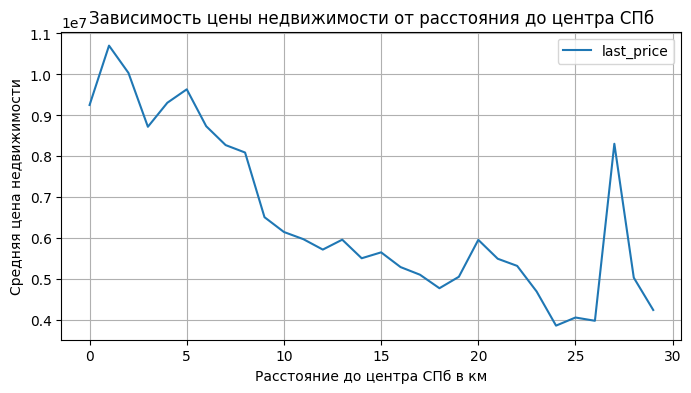

In [129]:
data.query('locality_name == "Санкт-Петербург"') \
.pivot_table(index='cityCenters_nearest_km', values='last_price') \
.plot(y='last_price', grid=True, figsize=(8, 4))
plt.title('Зависимость цены недвижимости от расстояния до центра СПб')
plt.xlabel('Расстояние до центра СПб в км')
plt.ylabel('Средняя цена недвижимости')
plt.show()

**4.50** Сразу обращаем внимание на скачки в графике: на позиции в 0, 20 и 27 км. 

Построим график с количеством продаваемых квартир по каждому километру, чтобы понимать какой объем данных заложен на каждом километре.

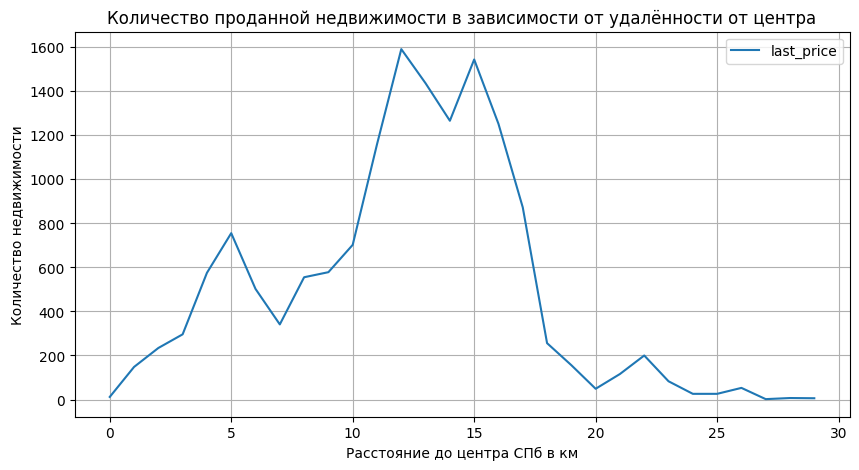

In [130]:
data.query('locality_name == "Санкт-Петербург"') \
.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='count') \
.plot(y='last_price', grid=True, figsize=(10, 5))
plt.title('Количество проданной недвижимости в зависимости от удалённости от центра')
plt.xlabel('Расстояние до центра СПб в км')
plt.ylabel('Количество недвижимости')
plt.show()

**4.51** На графике со средней ценой за километр мы видим, что **чем ближе к центру, тем выше цена за 1 кв. м. недвижимости**. Особенно явно видна эта зависимость с 5-й по 18-й км, где объём данных на каждый километр велик. Разница между ценой на 1-м и 25-м километрах составляет около 6,5 млн.

Есть и странные **скачки на графике**. Например, странно, что **цена недвижимости в самом центре города ниже, чем цена нидвижимости, находящейся в 1 км от центра**. Скорее всего, это объясняется тем, что объектов на "нулевом" км в выборке очень мало, поэтому судить по такому кол-ву данных не стоит. 

Также мы видим **большие скачки на 20-м км и особенно на 27-м км.** Опять же, данных о таких объеках в выборке представлено мало. И возможно, такая цена обусловлена элитными районами или наличием ЖК бизнес-класса. 

**4.52 Промежуточный вывод:**
- **Чем ближе к центру расположена недвижимость, тем выше её цена.**
- **Есть показатели, выбивающиеся из графика: большое повышение цены на 20-м и 27-м километрах. Возможно, это обусловлено дорогими районами или ЖК.**

<a id="5"></a>
##  Общий вывод

Поставленная задача — провести исследовательский анализ данных, который поможет установить параметры, влияющие на цену объектов.
В рамках исследования были получены следующие выводы.

**Общая информация по объектам:**

- Общая площадь недвижимости напрямую влияет на её цену (чуть меньшее влияние оказывают жилая площадь и площадь кухни).
- Чем больше комнат, тем выше средняя цена на надвижимость.
- Объекты на первом этаже стоят дешевле недвижимости, расположенной на других этажах.
- В выходные дни и летние месяцы (а также в октябре) недвижимость стоит дешевле. Декабрь самый дорогой месяц.
- С 2014 по 2017 год наблюдалось снижение средней цены объекта, с 2017 по 2019 год происходил плавный рост цен.

**Помимо вышеперечисленных пунктов, на цену недвижимости сильно влияет её расположение относительно центра города. Были рассмотрены цены на квартиры Санкт-Петербурга и сделаны следующие выводы:**

- Чем ближе к центру расположена недвижимость, тем выше её цена.
- Есть показатели, выбивающиеся из графика: большое повышение цен недвижимости на 20-м и 27-м километрах. Возможно, это обусловлено дорогими районами или наличием ЖК бизнес-класса.

**Данные о средней цене за кв. м. в разных населённых пунктах**:

- Самая высокая цена за квадратный метр в Санкт-Петербурге (109,6 тысяч за кв. м.).
- В 10-м по стоимости кв. м. населённом пункте цена составляет уже 72 тысячи: видно стремительное снижение цены относительно Санкт-Петербурга.
- Минимальная стоимость кв. м. недвижимости в окрестностях Санкт-Петербурга составляет 63 559.
- Средняя цена за кв. м. недвижимости, расположенной в топ-10 населённых пунктов по кол-ву объявлений, — 86 680.


**Также были получены данные о скорости продажи квартир**:

- Более половины квартир продаётся в педиод до 100 дней.
- Если квартира продалась в период до 42 дней, это можно назвать быстрой продажей: только 25% продалось за столько дней.
- 25% квартир были размещены на продаже более полугода (от 224 дней), при этом достаточное количество объектов продавалось 1-2 года — это можно считать долгой продажей.
- Отдельные квартиры продавались 2-4 года. По небольшому количеству данных можно сделать вывод, что это аномально долгие продажи, которые нельзя рассматривать как типичные.
